In [18]:
using CosmoMMF
using PyPlot
using JLD2
using PyCall

mpl = pyimport("matplotlib")

plt.style.use("light_mode")

┌ Info: Precompiling CosmoMMF [70302bc8-d3c5-42b6-97d0-438349a59312]
└ @ Base loading.jl:1317


In [6]:
typeof(7)

Int64

In [19]:
function plot_fields(sphere_field, cylinder_field, wall_field)
    """
    A helper plotting function to plot the projected density fields of the 
    sphere, cylinder, and wall.
    """

    f, axes = plt.subplots(3, 2, figsize=(8,12))
    
    #top left
    # ax1 = plt.subplot(321)
    field = sum(sphere_field, dims=2)
    axes[1, 1].imshow(field[:,1,:])
    axes[1, 1].set_title("Sphere-xz")
    
    #top right
    # ax2 = plt.subplot(322)
    field = sum(sphere_field, dims=3)
    axes[1, 2].imshow(field[:,:,1])
    axes[1, 2].set_title("Sphere-xy")
    axes[1, 2].set_xlabel("x-axis")
    axes[1, 2].set_ylabel("y-axis")
    #mid left
    # ax3 = plt.subplot(323)
    field = sum(cylinder_field, dims=2)
    axes[2, 1].imshow(field[:,1,:])
    axes[2, 1].set_title("Cylinder-xz")
    
    #mid right
    # ax4 = plt.subplot(324)
    field = sum(cylinder_field, dims=3)
    axes[2, 2].imshow(field[:,:,1])
    axes[2, 2].set_title("Cylinder-xy")
    
    #bottom left
    # ax5 = plt.subplot(325)
    field = sum(wall_field, dims=2)
    axes[3, 1].imshow(field[:,1,:])
    axes[3, 1].set_title("Wall-xz")
    
    #bottom right
    # ax6 = plt.subplot(326)
    field = sum(wall_field, dims=3)
    axes[3, 2].imshow(field[:,:,1])
    axes[3, 2].set_title("Wall-xy")
    

    for i in 1:3
        for j in 1:2
            if j == 1
                axes[i, j].set_xlabel("x-axis")
                axes[i, j].set_ylabel("z-axis")
            elseif j == 2
                axes[i, j].set_xlabel("x-axis")
                axes[i, j].set_ylabel("y-axis")
            end
            
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            axes[i, j].set_xticklabels([])
            axes[i, j].set_yticklabels([])
            
        end
    end

    f.tight_layout()
    plt.show()
end

plot_fields (generic function with 1 method)

In [20]:
resolution = 64

64

### Make Test Density Fields

In [21]:
sphere_field = CosmoMMF.sphere(resolution,5.0)
cylinder_field = CosmoMMF.cylinder(resolution,5.0)
wall_field = CosmoMMF.wall(resolution)

print("Create Test Case Density Fields")

Create Test Case Density Fields

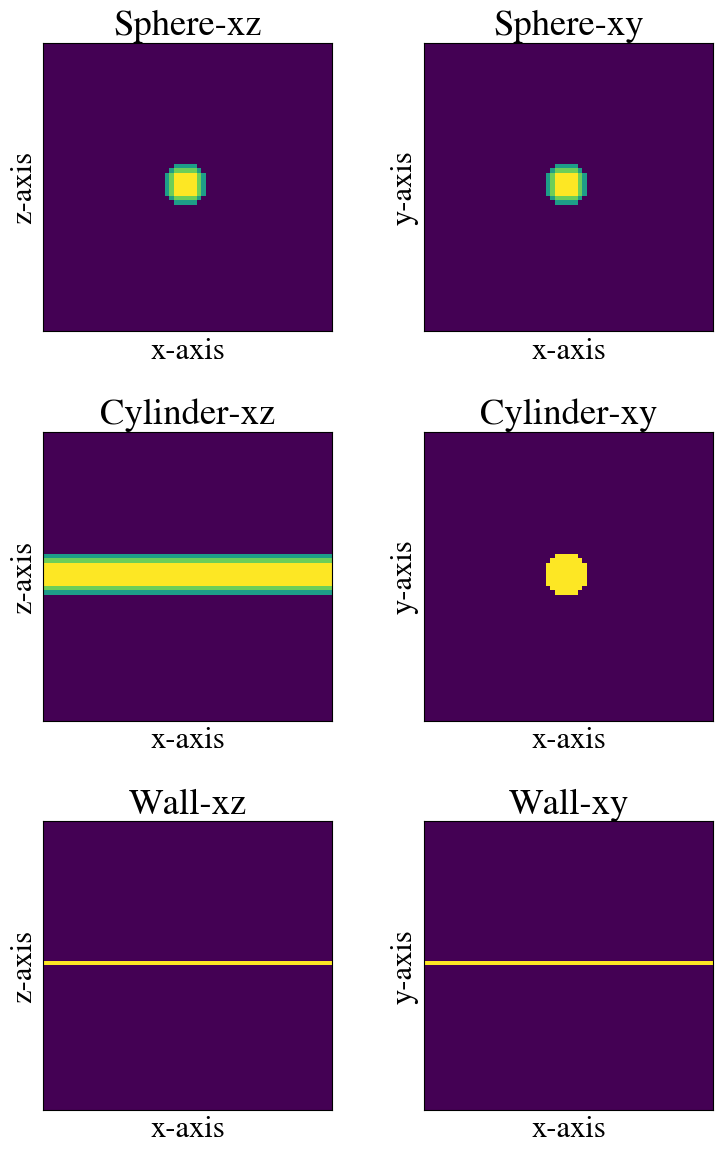

In [22]:
plot_fields(sphere_field, cylinder_field, wall_field)

### Perform Smoothing


#### Log Smoothing - NEXUS+

In [23]:
wave_vecs = CosmoMMF.wavevectors3D((resolution,resolution,resolution))

log_smooth_sphere_field = CosmoMMF.smooth_loggauss(sphere_field, 4.0, wave_vecs)
log_smooth_cylinder_field = CosmoMMF.smooth_loggauss(cylinder_field, 4.0, wave_vecs)
log_smooth_wall_field = CosmoMMF.smooth_loggauss(wall_field, 4.0, wave_vecs)

print("log smoothing")

log smoothing

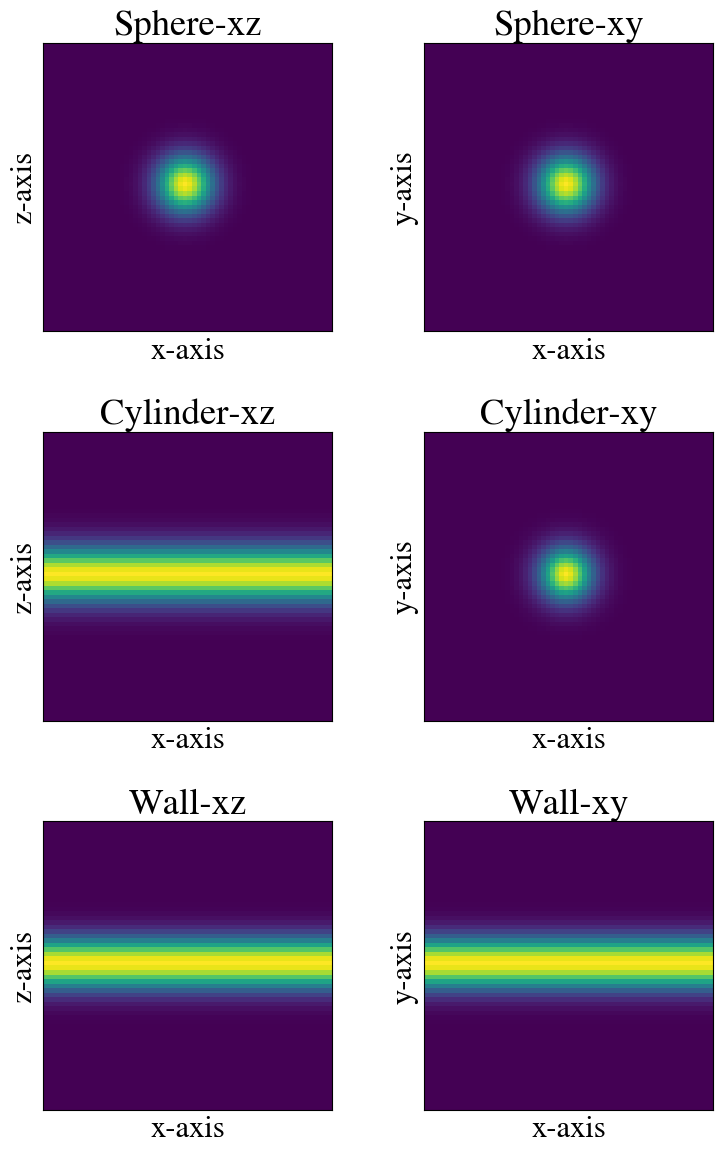

In [24]:
plot_fields(log_smooth_sphere_field, log_smooth_cylinder_field, log_smooth_wall_field)

#### Normal Smoothing - NEXUS

In [25]:
wave_vecs = CosmoMMF.wavevectors3D((resolution,resolution,resolution))

smooth_sphere_field = CosmoMMF.smooth_gauss(sphere_field, 4.0, wave_vecs)
smooth_cylinder_field = CosmoMMF.smooth_gauss(cylinder_field, 4.0, wave_vecs)
smooth_wall_field = CosmoMMF.smooth_gauss(wall_field, 4.0, wave_vecs)

print("standard smoothing")

standard smoothing

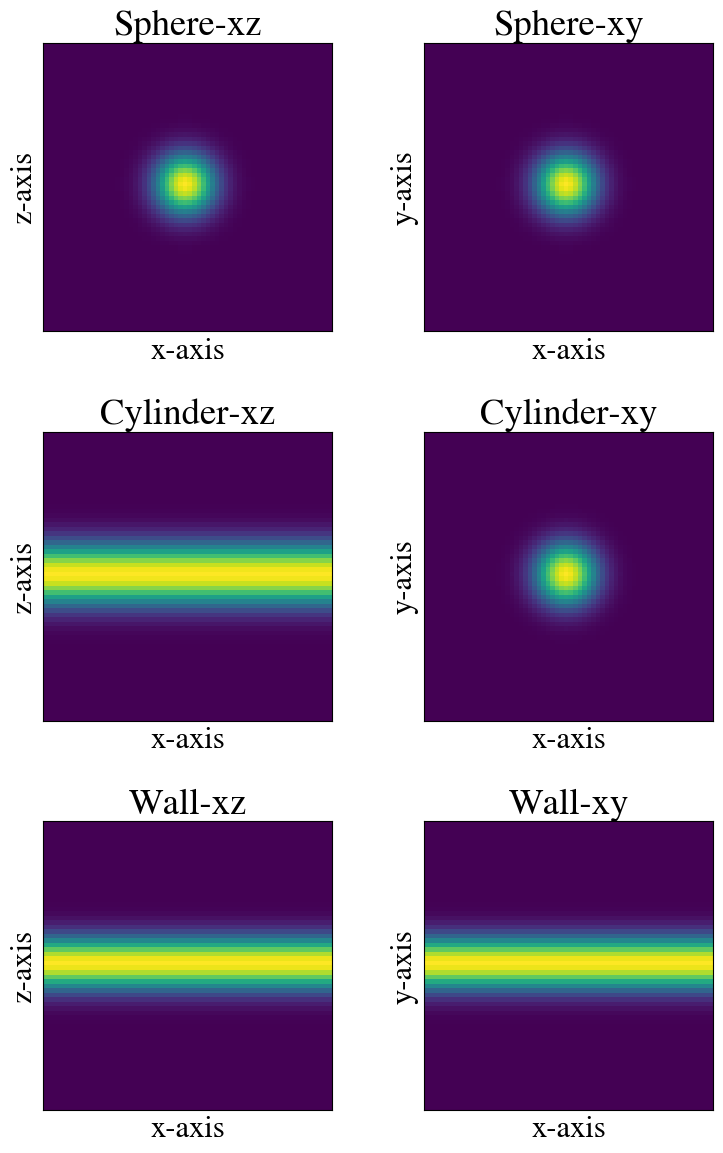

In [26]:
plot_fields(smooth_sphere_field, smooth_cylinder_field, smooth_wall_field)

In [78]:
Rs = (√2) .^ 0:5

#use Nexus+ by Default
max_sigs_sphere = CosmoMMF.maximum_signature(Rs, sphere_field)
max_sigs_cylinder = CosmoMMF.maximum_signature(Rs, cylinder_field)
max_sigs_wall = CosmoMMF.maximum_signature(Rs, wall_field)

print("calculate the Maximum Signatures 𝒮 with NEXUS+")

max_sigs_sphere_ = CosmoMMF.maximum_signature(Rs, sphere_field, alg=:NEXUS)
max_sigs_cylinder_ = CosmoMMF.maximum_signature(Rs, cylinder_field, alg=:NEXUS)
max_sigs_wall_ = CosmoMMF.maximum_signature(Rs, wall_field, alg=:NEXUS)

print("calculate the Maximum Signatures 𝒮 with NEXUS")

calculate the Maximum Signatures 𝒮 with NEXUS+calculate the Maximum Signatures 𝒮 with NEXUS

In [28]:
size(max_sigs_sphere)

(64, 64, 64, 3)

In [82]:
output_directory = "/global/homes/j/james12/CosmoMMF/notebooks/Temp_data/"

save_name = "test_sphere"
max_sigs_sphere_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, sphere_field)
@load "Temp_data/max_sigs_test_sphere_full_signatures.jld2" sigmax
max_sigs_sphere_RR = sigmax

save_name = "test_cylinder"
max_sigs_cylinder_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, cylinder_field)
@load "Temp_data/max_sigs_test_cylinder_full_signatures.jld2" sigmax
max_sigs_cylinder_RR = sigmax

save_name = "test_wall"
max_sigs_wall_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, wall_field)
@load "Temp_data/max_sigs_test_wall_full_signatures.jld2" sigmax
max_sigs_wall_RR = sigmax

print("compute max sigs Reduced RAM")

# max_sigs_cylinder_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, cylinder_field)
# max_sigs_wall_RR = CosmoMMF.reduce_RAM_maximum_signature(Rs, output_directory, save_name, wall_field)


Computing All Hessian Values: 

Compiling Hessians & Calculating Max Signatures: 

Computing All Hessian Values: 

Compiling Hessians & Calculating Max Signatures: 

Computing All Hessian Values: 

Compiling Hessians & Calculating Max Signatures: 
compute max sigs Reduced RAM

In [81]:
# plot_fields(max_sigs_sphere[:,:,:,1], max_sigs_cylinder[:,:,:,1], max_sigs_wall[:,:,:,1])
# plot_fields(max_sigs_sphere[:,:,:,2], max_sigs_cylinder[:,:,:,2], max_sigs_wall[:,:,:,2])
# plot_fields(max_sigs_sphere[:,:,:,3], max_sigs_cylinder[:,:,:,3], max_sigs_wall[:,:,:,3])

In [83]:
bool_filter = sphere_field .== 1
max_sigs_sphere[bool_filter,:] == max_sigs_sphere_RR[bool_filter, :]

true

In [84]:
bool_filter = cylinder_field .== 1
max_sigs_cylinder[bool_filter,:] == max_sigs_cylinder_RR[bool_filter, :]

false

In [85]:
bool_filter = wall_field .== 1
max_sigs_wall[bool_filter,:] == max_sigs_wall_RR[bool_filter, :]

true

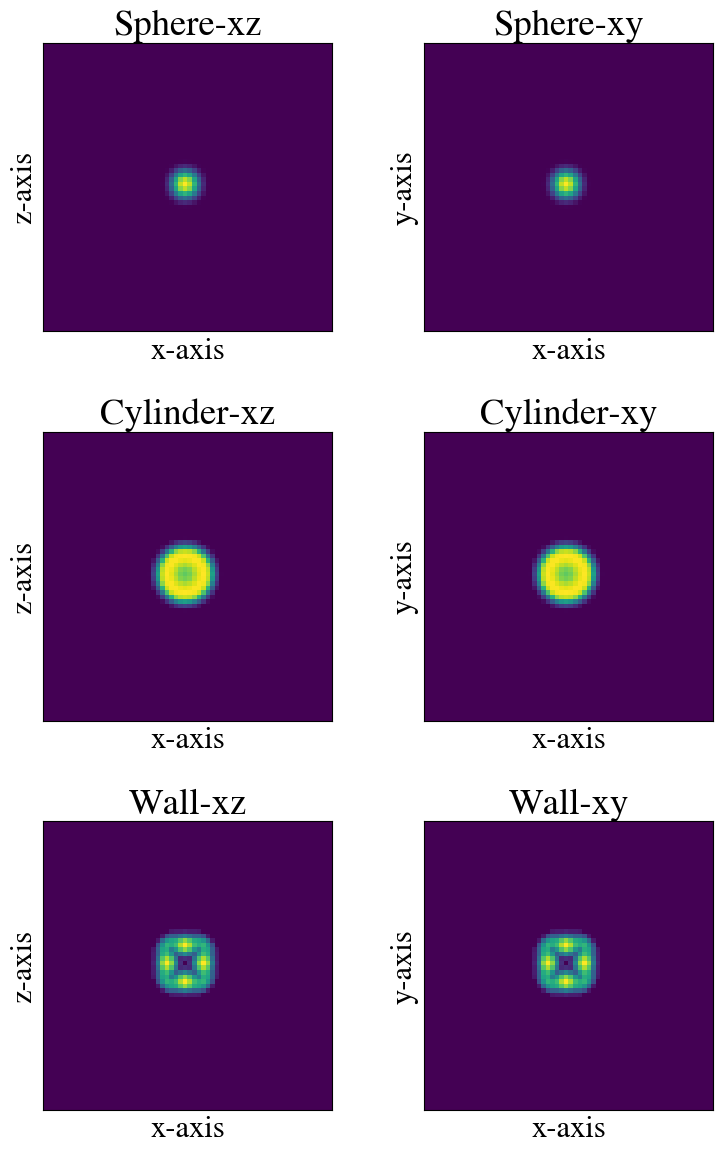

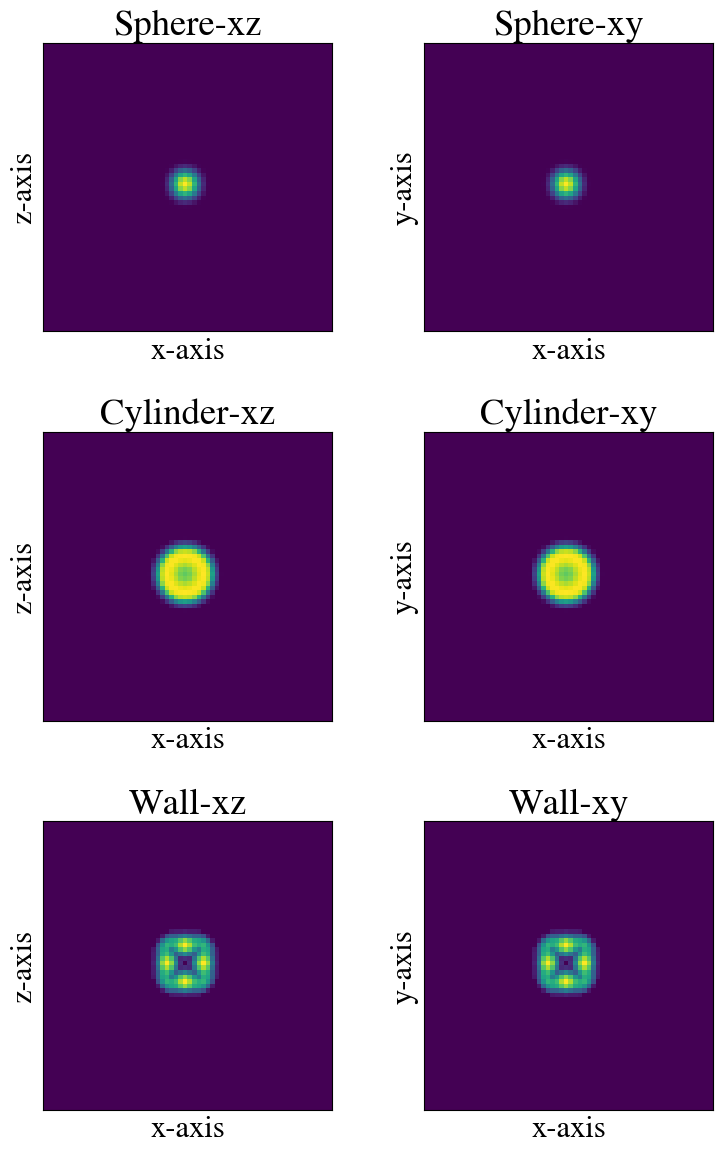

In [99]:
plot_fields(max_sigs_sphere[:,:,:,1], max_sigs_sphere[:,:,:,2], max_sigs_sphere[:,:,:,3])
plot_fields(max_sigs_sphere_RR[:,:,:,1], max_sigs_sphere_RR[:,:,:,2], max_sigs_sphere_RR[:,:,:,3])



In [34]:
@load "/global/cscratch1/sd/james12/simple_density_cubes/density_cube_snap_099_full_1024_dm.jld2" den

1-element Vector{Symbol}:
 :den

In [114]:
small_density = den[1:128, 1:128, 1:128] .+ 0.001

print("small")

den = small_density

# @save "../test/test_data/test_density_field.jld2" den

small

In [76]:
Rs = (√2) .^ 0:5

print(Rs)
max_sigs_nexusplus = CosmoMMF.maximum_signature(Rs, small_density, alg=:NEXUSPLUS)
# max_sigs_nexus = CosmoMMF.maximum_signature(Rs, small_density, alg=:NEXUS)

print("Calculate Max Signatures")

1.0:1.0:5.0Calculate Max Signatures

In [150]:

DM_particle_mass = 0.0047271638660809
N_DM = 15625000000
N_cells = 1024^3

mass_of_average_cell = DM_particle_mass * N_DM / N_cells

mass_of_average_cell * 100

6.878928784980817

In [38]:
small_density

128×128×128 Array{Float64, 3}:
[:, :, 1] =
 0.775086   0.461303   0.351756   …  0.0335374  0.0470022  0.049967
 0.463835   0.648863   0.664849      0.0674725  0.0639188  0.0465702
 1.2551     8.50716    6.9524        0.0495765  0.0648806  0.0550078
 1.03941    2.12458    1.83377       0.0399157  0.0411086  0.0227022
 0.651128   0.486225   0.59511       0.029344   0.0424028  0.0292217
 0.54359    0.503665   0.445703   …  0.033284   0.034006   0.0149903
 0.204929   0.130897   0.110668      0.0664896  0.0490584  0.0417609
 0.0534556  0.0511958  0.0534891     0.105307   0.0910592  0.134245
 0.0595399  0.0148464  0.0307382     0.0529791  0.07667    0.0450796
 0.0300289  0.0602201  0.105856      0.222561   0.0770336  0.0284413
 0.0956684  0.100767   0.0723173  …  0.270098   0.279844   0.177342
 0.180084   0.212307   0.115244      0.132503   0.241107   0.214054
 0.422284   0.512061   0.370406      0.0384259  0.0854963  0.213335
 ⋮                                ⋱  ⋮                     
 0.27

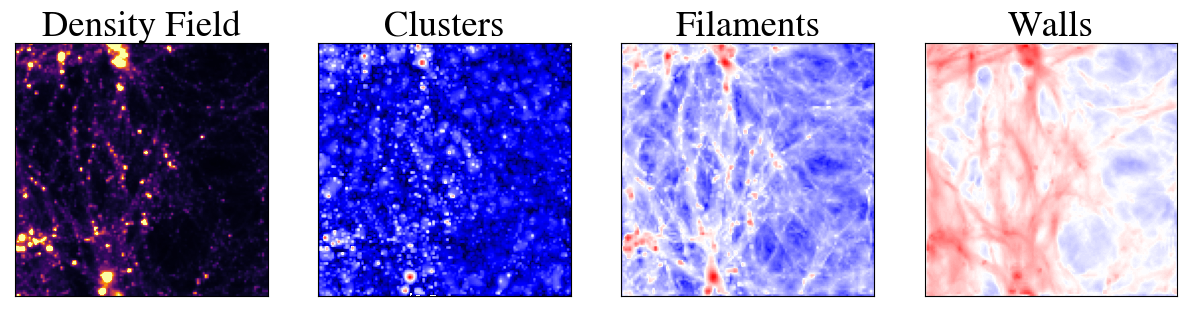

In [89]:
f, axes = plt.subplots(1,4, sharey=true,figsize=(15,4))
max_val = 5
cmap_="seismic"
axes[1].imshow(sum(small_density, dims=3)[:,:,1], vmin=0.001, vmax=500.0,cmap="inferno")
axes[1].set_title("Density Field")
axes[2].imshow(sum(max_sigs_nexusplus, dims=3)[:,:,1,1],cmap=cmap_,
norm=mpl.colors.LogNorm(vmin=0.001, vmax=100000.0))
axes[2].set_title("Clusters")
axes[3].imshow(sum(max_sigs_nexusplus, dims=3)[:,:,1,2],cmap=cmap_,
norm=mpl.colors.LogNorm(vmin=0.001, vmax=100000.0))
axes[3].set_title("Filaments")
axes[4].imshow(sum(max_sigs_nexusplus, dims=3)[:,:,1,3],cmap=cmap_,
    norm=mpl.colors.LogNorm(vmin=0.001, vmax=100000.0))
axes[4].set_title("Walls")

for ax in axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
end



In [113]:
@load "/global/cscratch1/sd/james12/halo_data/Heavy_p_Light_p_Ultralight/All_Halos_Binned_TNG_Bool.jld2" halo

small_halos = halo[1:128, 1:128, 1:128]

print("small halos")

clusbool = small_halos

# @save "../test/test_data/test_clusbool.jld2" clusbool

small halos

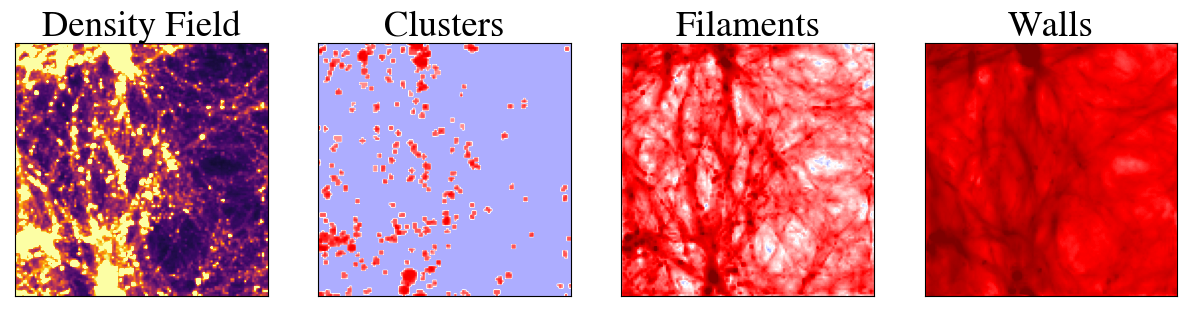

In [96]:
f, axes = plt.subplots(1,4, sharey=true,figsize=(15,4))
max_val = 5
cmap_="seismic"
axes[1].imshow(sum(small_density, dims=3)[:,:,1], vmin=0.001, vmax=100.0,cmap="inferno")
axes[1].set_title("Density Field")
axes[2].imshow(sum(small_halos .+ 0.001, dims=3)[:,:,1,1],cmap=cmap_,
norm=mpl.colors.LogNorm(vmin=0.001, vmax=100.0))
axes[2].set_title("Clusters")
axes[3].imshow(sum(max_sigs_nexusplus, dims=3)[:,:,1,2],cmap=cmap_,
norm=mpl.colors.LogNorm(vmin=0.001, vmax=100.0))
axes[3].set_title("Filaments")
axes[4].imshow(sum(max_sigs_nexusplus, dims=3)[:,:,1,3],cmap=cmap_,
    norm=mpl.colors.LogNorm(vmin=0.001, vmax=100.0))
axes[4].set_title("Walls")

for ax in axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
end


In [295]:
using Revise

In [147]:
clusbool, filbool, wallbool, S_fil, dM2_fil, S_wall, dM2_wall = CosmoMMF.calc_structure_bools(
    nothing, max_sigs_nexusplus, small_density, mass_of_average_cell*100, 0.1)
    
print("yes")

Components: 1622
viri frac: 0.0
mass frac: 0.18734114216118034
yes

In [143]:
maximum(clusbool)

true

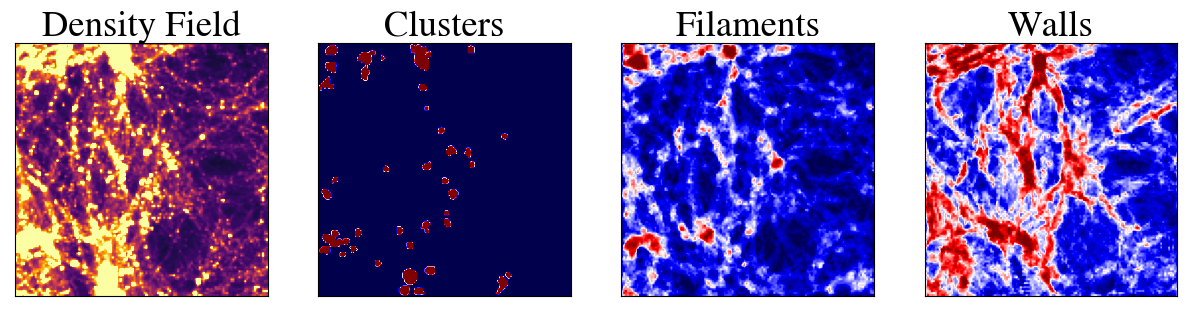

In [148]:
f, axes = plt.subplots(1,4, sharey=true,figsize=(15,4))
max_val = 5
cmap_="seismic"
axes[1].imshow(sum(small_density, dims=3)[:,:,1], vmin=0.001, vmax=100.0,cmap="inferno")
axes[1].set_title("Density Field")
axes[2].imshow(sum(clusbool, dims = 3)[:,:,1],cmap=cmap_, vmin=0, vmax=1)
axes[2].set_title("Clusters")
axes[3].imshow(sum(filbool, dims = 3)[:,:,1],cmap=cmap_, vmin=0, vmax=50)
axes[3].set_title("Filaments")
axes[4].imshow(sum(wallbool, dims = 3)[:,:,1],cmap=cmap_, vmin=0, vmax=50)
axes[4].set_title("Walls")

for ax in axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
end



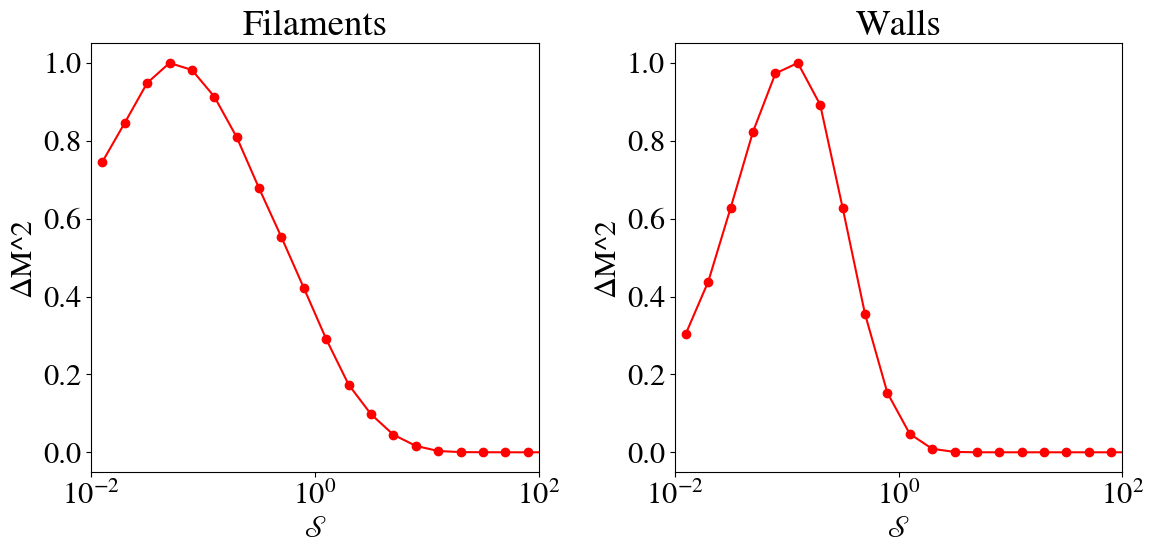

In [149]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.plot(S_fil, dM2_fil ./ maximum(dM2_fil), "ro")
ax1.plot(S_fil, dM2_fil ./ maximum(dM2_fil), "r-")
# ax1.axvline(filament_thresh, color="white", linestyle="--")
ax1.set_title("Filaments")
ax1.set_ylabel("ΔM^2")
ax1.set_xlabel("𝒮")
ax1.semilogx()
ax1.set_xlim(1e-2, 1e2)

ax2.plot(S_wall, dM2_wall ./ maximum(dM2_wall), "ro")
ax2.plot(S_wall, dM2_wall ./ maximum(dM2_wall), "r-")
ax2.semilogx()
ax2.set_title("Walls")
ax2.set_ylabel("ΔM^2")
ax2.set_xlabel("𝒮")
ax2.set_xlim(1e-2, 1e2)
# ax2.axvline(wall_thresh, color="white", linestyle="--")
f.tight_layout()

In [120]:
fil_max_index = findmax(dM2_fil ./ maximum(dM2_fil))[2]
fil_test_passed = dM2_fil[fil_max_index - 1] < dM2_fil[fil_max_index] || dM2_fil[fil_max_index + 1] < dM2_fil[fil_max_index]
print(test_passed)

wall_max_index = findmax(dM2_wall ./ maximum(dM2_wall))[2]
wall_test_passed = dM2_wall[wall_max_index - 1] < dM2_wall[wall_max_index] || dM2_wall[wall_max_index + 1] < dM2_wall[wall_max_index]

true

true

In [107]:
dM2_wall[max_index - 1] < dM2_wall[max_index]

true

In [154]:

wave_vecs = CosmoMMF.wavevectors3D((resolution,resolution,resolution))

H_slow = CosmoMMF.slow_hessian_from_smoothed(smooth_sphere_field, 4.0, wave_vecs)
H_fast = CosmoMMF.fast_hessian_from_smoothed(smooth_sphere_field, 4.0, wave_vecs)


H_slow == H_fast

true